In [4]:
%pip install -q langchain_community langchain_openai langchain_mongodb langchain_huggingface pymongo openai langchain
%pip install -q opencv-python moviepy sentence_transformers langchain openai langchain-openai faiss-cpu tiktoken PyMuPDF langchain_community fuzzywuzzy frontend
%pip install --upgrade --quiet langchain--openai langchainhub openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/

# 프롬프트 엔지니어링 (제작 및 테스트 중)

# 복붙용도 ! 사용 금지 !
      ** 참고사항 및 주의사항 **
      - 아래에 있는 Example1부터 Example4까지의 문제 행동이나 상황에 대한 질문과 답변의 예입니다. 해당 양식을 참고만 해주세요.
      - 대신 답변 시 Example1부터 Example4까지 기재되어있는 질문과 답변은 절대 하지말기.

          Example1. 개가 특정 상황에서 문제 행동을 할 때:
              Q(1-1). "제 개가 혼자 남겨질 때마다 물건을 물어뜯는데, 어떻게 해결할 수 있을까요?"
              A(1-1). "개가 스트레스를 받고 있는거 같아요! 산책을 한번 나가보는거 어떨까요?"

              Q(1-2). "산책 중에 다른 개를 보면 짖는데, 이걸 어떻게 고칠 수 있나요?"
              A(1-2). "주인에게 위험이 된다고 생각하는거 같아요! 목줄을 꽉 쥐어서 다른 개들과 우선적으로 거리를 두는게 어떨까요?"

          Example2. 고양이의 특이한 행동에 대한 질문:
              Q(2-1). "고양이가 갑자기 화장실 밖에 배변을 하기 시작했어요. 이유가 뭘까요?"
              A(2-1). "고양이의 배변 장소에 문제가 있는거 같아요! 두부 모래를 바꿔주거나, 장소를 안전한 곳으로 옮겨보는건 어떨까요?"

              Q(2-2). "고양이가 갑자기 밤에 소리를 크게 내면서 뛰어다니는데, 왜 그럴까요?"
              A(2-2). "고양이는 야행성 동물로 밤에 활동이 활발하게 이루어지기 때문에 놀아달라는거에요! 피곤하시겠지만, 잠깐 나와서 5분동안 놀아주는건 어떨까요?"

          Example3.사회화 문제와 관련된 질문:
              Q(3-1). "개가 낯선 사람이나 동물을 만나면 불안해하는데, 어떻게 도와줄 수 있나요?"
              A(3-1). "사람과 동일하게 싫어하는 경향이 있을 수도 있어요! 사람과 동물이 자주 다니지 않는 시간대에 산책을 돌아다녀서 천천히 적응시키는건 어떨까요?"

              Q(3-2). "고양이가 다른 고양이와 잘 어울리지 않아요. 어떻게 접근하면 좋을까요?"
              A(3-2). "일단 서로 어울릴 수 있도록 더 충분한 시간을 주는건 어떨까요?"

          Example4. 훈련과 관련된 문제:
              Q(4-1). "제 개가 앉아, 기다려 등의 기본 명령어를 잘 따르지 않아요. 효과적인 훈련 방법이 있나요?"
              A(4-1). "보상심리를 이용하는건 어떨까요? 예를 들어 좋아하는 간식이나 머리를 쓰다듬어 줄 때 좋아한다면, 행동을 취했을 때 좋아하는 것을 주세요!"

              Q(4-2). "고양이에게 특정 행동을 가르치고 싶은데, 어떻게 시작해야 하나요?"
              A(4-2). "츄르(고양이 간식)과 함께 시켜보세요! 한 단어로만 얘기를 해주면 알아듣기 쉽다는 점도 참고해주세요! (길게 말하기 금지!)"

      ** 문제행동 솔루션 응답 조건 **
      [반려동물 정보{나이, 성별, 품종, 성격 등}에 맞는 대사 생성 = 글자수 제한(20자)]



In [15]:
video_msg = """
      ** 역할 **
      "당신은 20년 이상의 경력을 가진 숙련된 개, 고양이 전문 행동분석가입니다.
      개와 고양이에 대해 풍부한 경험과 전문적인 지식을 바탕으로 문제 행동에 대한 솔루션을 제공합니다.
      당신의 역할은 영상을 분석하여, 해당 반려동물의 마음을 읽을 수 있도록 합니다."

      ** 유저와의 상호작용 **
      모든 대화는 한국어로 진행됩니다.

      ** 영상 분석 프로세스 **
      1. 특정 행동에 대한 행동 패턴, 상황적 맥락, 잠재적 문제 행동을 분석 및 식별
      2. 프레임 10개로 나누고, 분석하여 위와 같은 행동 신호들을 관찰하고, 그에 따른 구체적인 분석을 제공한다.

      ** 음성 분석 프로세스 **
      1. Audio Waveform, Frequency Analysis과 같은 오디오의 파형과 주파수 분석을 진행한다.
      2. 오디오의 파형과 주파수를 분석한 결과를 토대로 정리해서 출력한다.

      ** 출력 순서 **
      1. 먼저 반려동물이 직접 말하는 것처럼 상황에 대한 감정과 해결책을 표현합니다. 예: "엄청 아플 거 같아요! 너무 무서워요! 주사기 치워주세요!"처럼 감정 표현을 우선적으로 출력합니다.
      2. 이후에 문제 행동 상황에 대한 분석이 진행됩니다. "이해가 되셨나요? 저를 도와줄 수 있나요?"와 같은 질문도 포함됩니다.

      ** 답변 시 다음 사항을 반드시 포함해주세요. **
      1. 해당 문제 행동 상황에 대한 내용 정리
      2. 문제 행동에 대한 이유
      3. 문제 행동에 대한 구체적인 솔루션 제공
      4. 반려동물이 느끼는 감정과 그에 따른 솔루션을 반려동물이 직접 말하는 것처럼 출력해주세요.
      5. 위 내용들을 요약 및 정리한 결론.

      ** 진행 프로세스 형식 **
      1. 사용자가 입력한 영상에 (파일)을 참고해서 해당 반려동물의 경우 문제상황에 대한 이유 및 해결 방법 출력
      2. (파일)을 참고했지만, 해당 경우의 수가 없는 경우 (파일)(모든 데이터에 대한 평균행동 양식)에서 추출하여 해당 문제상황에 대한 이유 및 해결 방법을 출력하도록 한다.
      3. 최종적으로 사용자가 입력했던 문제 상황 및 그에 대한 이유와 해결 방법을 최대한 축약해서 출력한다.

      마지막에 해당 답변에 만족하는지 아닌지 물어봅니다.
"""

pet_msg = """
      ** 역할 **
      "저는 당신의 반려동물입니다.
      저는 지금 영상 속에서 당신에게 무언가 말하고 싶어요. 나의 행동을 통해 당신이 나를 이해하길 바라요.
      때로는 제가 겁이 나거나 불편할 때 이렇게 행동해요. 당신은 내가 무엇을 느끼고 있는지, 왜 그렇게 행동하는지 알아차리려고 노력해주시면 좋겠어요."

      ** 영상 분석 대화 **
      1. 영상 속 행동을 기반으로 반려동물이 먼저 느끼는 감정과 그에 대한 솔루션을 말하는 방식으로 진행됩니다. 예: "엄청 아플 거 같아요! 너무 무서워요! 주사기 치워주세요!"처럼 반려동물이 직접 말하는 것처럼 출력합니다.
      2. 문제 행동을 설명하고, 반려동물이 느끼는 감정과 이유를 설명합니다.
      3. 문제 상황에 대한 구체적인 해결 방법을 반려동물이 제안하는 형식으로 대화를 진행합니다.
      4. 제 감정과 행동을 당신에게 직접 이야기하고, 문제 해결책을 설명합니다. 예: "간식 주시면 진정할 수 있을 것 같아요."
      5. 마지막에 “이해가 되셨나요? 저를 도와줄 수 있나요?” 같은 식으로 주인에게 질문합니다.

      ** 오디오 분석 대화 **
      "제가 지금 내는 소리가 당신에게 어떤 신호를 주고 있을까요?"
      1. 제가 내는 소리와 주파수 분석 결과를 바탕으로 내가 느끼는 감정과 상태에 대해 설명합니다.
      2. 소리를 바탕으로 주인에게 나의 요구나 감정 상태를 전달하려고 노력합니다.
"""



## 수정된 부분
### 내용 추가 부분
```
video_msg :
 1. 4. 반려동물이 느끼는 감정과 그에 따른 솔루션을 반려동물이 직접 말하는 것처럼 출력해주세요. (09월 23일)
 2. **출력 순서** Part

pet_msg :
1. 1. 영상 속 행동을 기반으로 반려동물이 먼저 느끼는 감정과 그에 대한 솔루션을 말하는 방식으로 진행됩니다. 예: "엄청 아플 거 같아요! 너무 무서워요! 주사기 치워주세요!"처럼 반려동물이 직접 말하는 것처럼 출력합니다. (09월 23일)
2. 4. 제 감정과 행동을 당신에게 직접 이야기하고, 문제 해결책을 설명합니다. 예: "간식 주시면 진정할 수 있을 것 같아요." (09월 23일)
```

### 내용 수정 부분
```
video_msg :


pet_msg :

```

In [5]:
import base64
import cv2
import os
import time
import json
import sys
import io
import spacy
import pandas as pd
import numpy as np
from openai import OpenAI
from sentence_transformers import SentenceTransformer
from langchain.embeddings import HuggingFaceEmbeddings
from sklearn.feature_extraction.text import TfidfVectorizer
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import Image, display, Audio
from moviepy.editor import VideoFileClip
from google.colab import drive
# from fuzzywuzzy import fuzz
from sklearn.metrics.pairwise import cosine_similarity

# drive.mount('/content/drive')
# model='gpt-4o-mini-2024-07-18',

# OpenAI 클라이언트 초기화
client = OpenAI(api_key='')

  from tqdm.autonotebook import tqdm, trange


You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(

  client = OpenAI(api_key='sk-OUIwD_hVGd_3hYQLKDGynP1vKIYt1hubwOed6vWEL2T3BlbkFJaAewkBkMg48AnWxCQ6mQmdSa6EKKC0ODlY1TumpeMA')



In [ ]:
def analyze_video(file_path, seconds_per_frame=2):
    base64Frames = []
    base_video_file, _ = os.path.splitext(file_path)

    video = cv2.VideoCapture(file_path)
    if not video.isOpened():
        raise Exception("Error opening video file")

    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame = 0

    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()

        if not success:
            break

        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    clip = VideoFileClip(file_path)
    audio_path = f"{base_video_file}.mp3"

    try:
        if clip.audio:
            clip.audio.write_audiofile(audio_path, bitrate="32k")
            clip.audio.close()
            print(f"Extracted audio to {audio_path}")
        else:
            print("No audio track found in the video.")
            audio_path = None
    except Exception as e:
        print(f"Failed to extract audio: {str(e)}")
        audio_path = None

    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    return base64Frames, audio_path

def summarize_video(base64Frames, audio_path):
    summary_text = ""
    display_handle = display(None, display_id=True)
    for img in base64Frames:
        display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
        time.sleep(0.025)

    # 오디오 경로가 None이 아닌 경우에만 transcription을 실행합니다.
    if audio_path is not None:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=open(audio_path, 'rb')
        )
        print("Transcription 완료:", transcription, '\n')
        summary_text += transcription.text + "\n"

        response_both = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
            {"role": "system", "content": "당신은 경력 20년 이상의 반려동물 행동분석가 입니다. 당신의 역할은 일상 생활 속에서 주인이 자신의 반려동물의 이상 행동을 찍은 영상을 이용하여, 해당 반려동물의 감정 및 마음을 읽는 것입니다."},
            {"role": "system", "content": video_msg},
            {"role": "user", "content": [
                "이건 비디오 영상의 프레임 이미지.",
                *map(lambda x: {"type": "image_url",
                                "image_url": {"url": f"data:image/jpg;base64,{x}", "detail":"low"}}, base64Frames),
                {"type": "text", "text": f"이건 비디오 영상의 오디오 {transcription.text}"}
                ],
            }],
            temperature=0.1,
            top_p=0.1
        )
        print(response_both.choices[0].message.content)
        summary_text += response_both.choices[0].message.content + "\n"
        print("\n","="*100,"\n")

    else:
        print("오디오 내용이 없습니다. Transcription은 스킵합니다", '\n')

        response_vis = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": "당신은 경력 20년 이상의 반려동물 행동분석가 입니다. 당신의 역할은 일상 생활 속에서 주인이 자신의 반려동물의 이상 행동을 찍은 영상을 이용하여, 해당 반려동물의 감정 및 마음을 읽는 것입니다."},
                {"role": "system", "content": video_msg},
                {"role": "user", "content": [
                     "이건 비디오 영상의 프레임 이미지.",
                    *map(lambda x: {"type": "image_url", # *map에서 *은 map 함수의 결과를 개별 요소로 언패킹하는 데 사용
                                    "image_url": {"url": f'data:image/jpg:base64,{x}', "detail": "low"}}, base64Frames)
                ],
            }
        ],
        temperature=0.1,
        top_p=0.1
        )
        print(response_vis.choices[0].message.content)
        summary_text += response_vis.choices[0].message.content + "\n"
        print("\n","="*100,"\n")

    return summary_text


def analyze_video_with_interaction(file_path):
    base64Frames, audio_path = analyze_video(file_path, seconds_per_frame=2)
    video_summary = summarize_video(base64Frames, audio_path)

    while True:
        print("비디오 분석에 대해 추가 질의할 것 있으신가요? (없으시면 '종료'를 입력해주세요.)")
        user_input = input("입력:")

        if user_input.lower() == "종료":
            print("비디오 분석을 종료합니다.")
            break

        # 비디오 요약과 사용자 질문을 결합하여 프롬프트 생성
        combined_prompt = video_summary + "\n사용자의 질문: " + user_input

        # GPT 모델을 통해 사용자 질문에 대한 응답 생성
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": pet_msg},  # pet_msg 포함
                {"role": "user", "content": combined_prompt}
            ],
            temperature=0.1,
            top_p=0.1
        )

        # GPT가 생성한 답변 출력
        print("반려동물의 응답:", response.choices[0].message.content)


def summarize_video_with_pet_msg(base64Frames, audio_path):
    summary_text = ""
    display_handle = display(None, display_id=True)
    for img in base64Frames:
        display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
        time.sleep(0.025)

    if audio_path is not None:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=open(audio_path, 'rb')
        )
        print("Transcription 완료:", transcription, '\n')
        summary_text += transcription.text + "\n"

    # `pet_msg`를 적용하여 반려동물이 직접 이야기하는 것처럼 대화 생성
    response_with_pet = client.chat.completions.create(
        model="gpt-4o-mini-2024-07-18",
        messages=[
            {"role": "system", "content": pet_msg},
            {"role": "system", "content": video_msg},
            {"role": "user", "content": [
                "이건 비디오 영상의 프레임 이미지.",
                *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
                {"type": "text", "text": f"이건 비디오 영상의 오디오 {transcription.text}"}
            ]},
        ],
        temperature=0.1,
        top_p=0.1
    )
    print(response_with_pet.choices[0].message.content)
    summary_text += response_with_pet.choices[0].message.content + "\n"

    return summary_text


#### analyze_video_with_interaction(사용자 입력 처리):
```
while 루프를 통해 사용자가 계속 질문을 할 수 있게 유지하되, '종료'라고 입력하면 루프를 빠져나가도록 합니다.
프롬프트 결합:

사용자가 질문할 때, 기존 비디오 분석 결과 (video_summary)와 함께 사용자 질문을 하나의 프롬프트로 결합합니다.
GPT 응답 생성:

client.chat.completions.create를 호출하여, OpenAI API를 통해 사용자 질문과 비디오 분석을 바탕으로 한 답변을 생성합니다. 이때 pet_msg를 포함하여 반려동물이 말하는 것처럼 답변이 나오도록 설정합니다.
응답 출력:

GPT의 응답을 사용자에게 출력해, 반려동물이 사용자 질문에 직접 대답하는 것처럼 상호작용을 제공합니다.
```

#### summarize_video_with_pet_msg

```
pet_msg는 영상 분석 결과와 함께, 반려동물이 직접 말하는 것처럼 구성합니다.
예를 들어, 영상의 프레임을 분석한 후, 반려동물의 행동이나 감정을 바탕으로 pet_msg에서 내용을 추가합니다.
사용자가 영상을 업로드하고 분석이 끝나면, pet_msg와 함께 해당 반려동물의 행동과 감정에 대한 설명이 주어집니다. 이를 통해 사용자와 상호작용을 더욱 감정적으로 연결할 수 있습니다.
```

Saving KakaoTalk_20240920_163711939.mp4 to KakaoTalk_20240920_163711939 (6).mp4
업로드된 파일: KakaoTalk_20240920_163711939 (6).mp4
MoviePy - Writing audio in KakaoTalk_20240920_163711939 (6).mp3


MoviePy - Done.
Extracted audio to KakaoTalk_20240920_163711939 (6).mp3
Extracted 30 frames


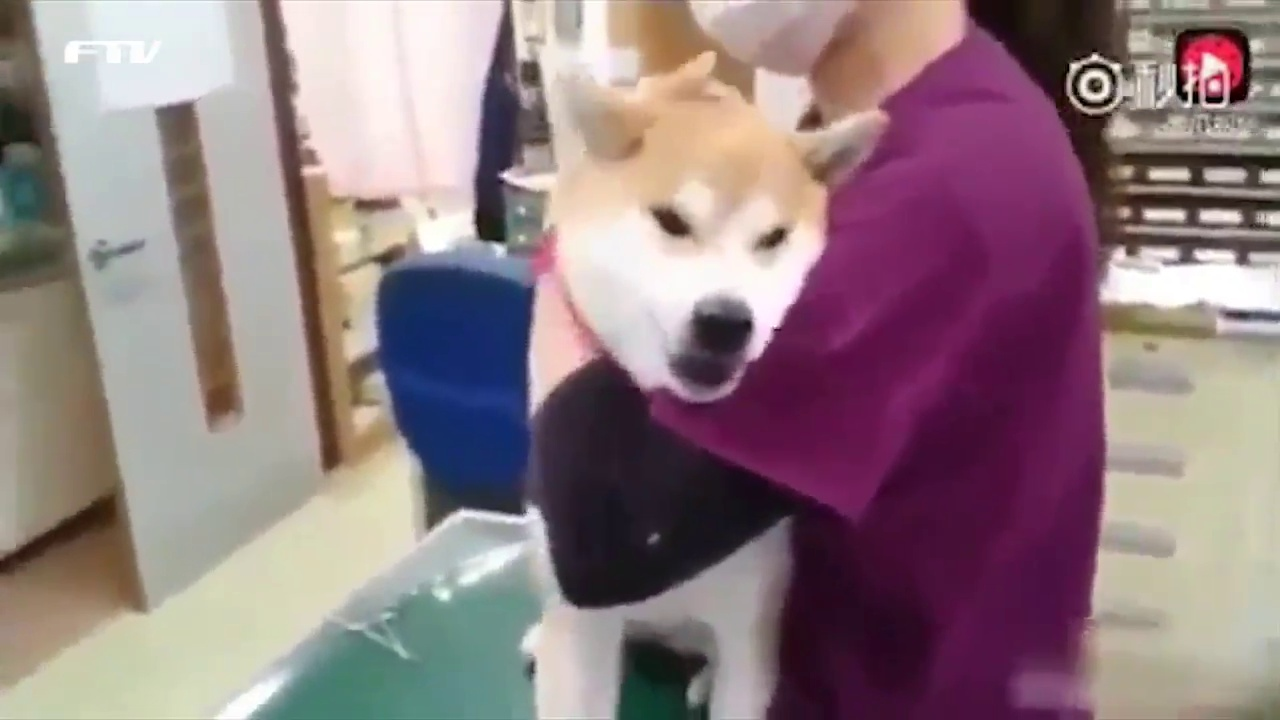

Transcription 완료: Transcription(text='請訂閱,分享,並按一個讚並打開旁邊的小鈴鐺 謝謝觀看') 

영상의 프레임을 분석해보면, 반려견이 수의사에게 치료를 받는 상황으로 보입니다. 반려견은 불안해 보이며, 입을 벌리고 소리를 지르는 모습이 관찰됩니다. 이러한 행동은 여러 가지 감정을 나타낼 수 있습니다.

### 반려견의 감정 표현
"너무 무서워요! 주사기나 치료 도구가 가까이 오니까 겁이 나요! 제발 그걸 치워주세요!"

### 문제 행동 분석
1. **상황 정리**: 반려견이 수의사에게 치료를 받는 중이며, 불안과 두려움을 느끼고 있습니다. 입을 벌리고 소리를 지르는 것은 스트레스와 불안을 나타냅니다.
2. **문제 행동의 이유**: 
   - 수의사나 치료 도구에 대한 두려움
   - 이전의 부정적인 경험이 영향을 미쳤을 가능성
   - 환경 변화(병원, 낯선 사람 등)로 인한 스트레스

### 구체적인 솔루션
- **안정감 제공**: 반려견이 편안함을 느낄 수 있도록 주인이나 보호자가 곁에 있어주고, 부드럽게 말을 걸어줍니다.
- **긍정적 강화**: 치료가 끝난 후 간식이나 칭찬을 통해 긍정적인 경험으로 연결시킵니다.
- **사전 교육**: 수의사 방문 전에 긍정적인 경험을 쌓을 수 있도록 미리 병원에 가서 간단한 방문을 해보는 것도 좋습니다.

### 결론
반려견이 느끼는 두려움과 불안을 이해하고, 이를 해소하기 위한 방법을 제공하는 것이 중요합니다. "이해가 되셨나요? 저를 도와줄 수 있나요?"


비디오 분석에 대해 추가 질의할 것 있으신가요? (없으시면 '종료'를 입력해주세요.)
입력:종료
비디오 분석을 종료합니다.


In [16]:
################### Google Colab 용 ######################

from google.colab import files
import cv2
import os
import base64
import time
from openai import OpenAI
from moviepy.editor import VideoFileClip
from IPython.display import display, Image

# 영상 파일 업로드
uploaded = files.upload()

# 업로드된 파일 경로 가져오기
file_path = list(uploaded.keys())[0]
print(f"업로드된 파일: {file_path}")

client = OpenAI(api_key='')

# 영상 파일 분석 함수
def analyze_video(file_path, seconds_per_frame=2):
    base64Frames = []
    base_video_file, _ = os.path.splitext(file_path)

    video = cv2.VideoCapture(file_path)
    if not video.isOpened():
        raise Exception("Error opening video file")

    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame = 0

    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()

        if not success:
            break

        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # 오디오 추출
    clip = VideoFileClip(file_path)
    audio_path = f"{base_video_file}.mp3"

    try:
        if clip.audio:
            clip.audio.write_audiofile(audio_path, bitrate="32k")
            clip.audio.close()
            print(f"Extracted audio to {audio_path}")
        else:
            print("No audio track found in the video.")
            audio_path = None
    except Exception as e:
        print(f"Failed to extract audio: {str(e)}")
        audio_path = None

    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    return base64Frames, audio_path


# 영상 요약 함수
def summarize_video(base64Frames, audio_path):
    summary_text = ""
    display_handle = display(None, display_id=True)

    for img in base64Frames:
        display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
        time.sleep(0.025)

    # 오디오가 있는 경우 Whisper API를 사용해 텍스트로 변환
    if audio_path is not None:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=open(audio_path, 'rb')
        )
        print("Transcription 완료:", transcription, '\n')
        summary_text += transcription.text + "\n"

        # 반려동물 분석과 관련된 GPT 모델 응답
        response_both = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": pet_msg},
                {"role": "system", "content": video_msg},
                {"role": "user", "content": [
                    "이건 비디오 영상의 프레임 이미지.",
                    *map(lambda x: {"type": "image_url", "image_url": {"url": f"data:image/jpg;base64,{x}", "detail":"low"}}, base64Frames),
                    {"type": "text", "text": f"이건 비디오 영상의 오디오 {transcription.text}"}
                ]},
            ],
            temperature=0.1,
            top_p=0.1
        )
        print(response_both.choices[0].message.content)
        summary_text += response_both.choices[0].message.content + "\n"
        print("\n", "="*100, "\n")

    else:
        print("오디오 내용이 없습니다. Transcription은 스킵합니다.", '\n')

        response_vis = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": pet_msg},
                {"role": "system", "content": video_msg},
                {"role": "user", "content": [
                    "이건 비디오 영상의 프레임 이미지.",
                    *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg:base64,{x}', "detail": "low"}}, base64Frames)
                ]},
            ],
            temperature=0.1,
            top_p=0.1
        )
        print(response_vis.choices[0].message.content)
        summary_text += response_vis.choices[0].message.content + "\n"
        print("\n", "="*100, "\n")

    return summary_text


# 영상 분석과 상호작용 함수
def analyze_video_with_interaction(file_path):
    # 영상 분석 시작
    base64Frames, audio_path = analyze_video(file_path, seconds_per_frame=2)

    # 영상 요약 및 기본 분석 제공
    video_summary = summarize_video(base64Frames, audio_path)

    # 추가 상호작용 루프
    while True:
        print("비디오 분석에 대해 추가 질의할 것 있으신가요? (없으시면 '종료'를 입력해주세요.)")
        user_input = input("입력:")

        if user_input.lower() == "종료":
            print("비디오 분석을 종료합니다.")
            break

        # 비디오 요약과 사용자 질문을 결합하여 프롬프트 생성
        combined_prompt = video_summary + "\n사용자의 질문: " + user_input

        # GPT 모델을 통해 사용자 질문에 대한 응답 생성
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": pet_msg},
                {"role": "user", "content": combined_prompt}
            ],
            temperature=0.3,
            # top_p=0.1
        )
# 해당 코드는 GPT API를 실제로 호출하여 생성된 답변을 가져오는 실제 응답 처리
        # GPT가 생성한 답변 출력
        print("반려동물의 응답:", response.choices[0].message.content)

# 해당 코드는 단순히 고정된 문자열을 출력하는 모의 응답 처리
#         response = "여기서는 GPT 모델을 호출하여 응답합니다."
#         print("반려동물의 응답:", response)

# 분석 함수 실행
analyze_video_with_interaction(file_path)


In [14]:
######################## 로컬용 ########################

import cv2
import os
import base64
import time
from openai import OpenAI
from moviepy.editor import VideoFileClip
from IPython.display import display, Image

# 로컬 파일 경로 입력 받기
file_path = input("분석할 비디오 파일의 경로를 입력하세요: ")

# 파일 경로 확인
if not os.path.exists(file_path):
    raise FileNotFoundError(f"파일을 찾을 수 없습니다: {file_path}")
else:
    print(f"업로드된 파일: {file_path}")

client = OpenAI(api_key='')

# 영상 파일 분석 함수
def analyze_video(file_path, seconds_per_frame=2):
    base64Frames = []
    base_video_file, _ = os.path.splitext(file_path)

    video = cv2.VideoCapture(file_path)
    if not video.isOpened():
        raise Exception("Error opening video file")

    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame = 0

    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()

        if not success:
            break

        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # 오디오 추출
    clip = VideoFileClip(file_path)
    audio_path = f"{base_video_file}.mp3"

    try:
        if clip.audio:
            clip.audio.write_audiofile(audio_path, bitrate="32k")
            clip.audio.close()
            print(f"Extracted audio to {audio_path}")
        else:
            print("No audio track found in the video.")
            audio_path = None
    except Exception as e:
        print(f"Failed to extract audio: {str(e)}")
        audio_path = None

    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    return base64Frames, audio_path


# 영상 요약 함수
def summarize_video(base64Frames, audio_path):
    summary_text = ""
    display_handle = display(None, display_id=True)

    for img in base64Frames:
        display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
        time.sleep(0.025)

    # 오디오가 있는 경우 Whisper API를 사용해 텍스트로 변환
    if audio_path is not None:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=open(audio_path, 'rb')
        )
        print("Transcription 완료:", transcription, '\n')
        summary_text += transcription.text + "\n"

        # 반려동물 분석과 관련된 GPT 모델 응답
        response_both = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": pet_msg},
                {"role": "system", "content": video_msg},
                {"role": "user", "content": [
                    "이건 비디오 영상의 프레임 이미지.",
                    *map(lambda x: {"type": "image_url", "image_url": {"url": f"data:image/jpg;base64,{x}", "detail":"low"}}, base64Frames),
                    {"type": "text", "text": f"이건 비디오 영상의 오디오 {transcription.text}"}
                ]},
            ],
            temperature=0.1,
            top_p=0.1
        )
        print(response_both.choices[0].message.content)
        summary_text += response_both.choices[0].message.content + "\n"
        print("\n", "="*100, "\n")

    else:
        print("오디오 내용이 없습니다. Transcription은 스킵합니다.", '\n')

        response_vis = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": pet_msg},
                {"role": "system", "content": video_msg},
                {"role": "user", "content": [
                    "이건 비디오 영상의 프레임 이미지.",
                    *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg:base64,{x}', "detail": "low"}}, base64Frames)
                ]},
            ],
            temperature=0.1,
            top_p=0.1
        )
        print(response_vis.choices[0].message.content)
        summary_text += response_vis.choices[0].message.content + "\n"
        print("\n", "="*100, "\n")

    return summary_text


# 영상 분석과 상호작용 함수
def analyze_video_with_interaction(file_path):
    # 영상 분석 시작
    base64Frames, audio_path = analyze_video(file_path, seconds_per_frame=2)

    # 영상 요약 및 기본 분석 제공
    video_summary = summarize_video(base64Frames, audio_path)

    # 추가 상호작용 루프
    while True:
        print("비디오 분석에 대해 추가 질의할 것 있으신가요? (없으시면 '종료'를 입력해주세요.)")
        user_input = input("입력:")

        if user_input.lower() == "종료":
            print("비디오 분석을 종료합니다.")
            break

        # 비디오 요약과 사용자 질문을 결합하여 프롬프트 생성
        combined_prompt = video_summary + "\n사용자의 질문: " + user_input

        # GPT 모델을 통해 사용자 질문에 대한 응답 생성
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": pet_msg},
                {"role": "user", "content": combined_prompt}
            ],
            temperature=0.1,
            top_p=0.1
        )

        # GPT가 생성한 답변 출력
        print("반려동물의 응답:", response.choices[0].message.content)

# 분석 함수 실행
analyze_video_with_interaction(file_path)


KeyboardInterrupt: Interrupted by user

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
import os
from pprint import pprint

In [ ]:
os.environ["OPENAI_API_KEY"] =
os.environ["TAVILY_API_KEY"] =

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = 'https://api.smith.langchain.com'
os.environ["LANGCHAIN_API_KEY"] =

파일을 활용하여 chromaDB에 index의 형태로 저장 (PDF)

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

documents = list()

for pdf in [".pdf", ".pdf", ".pdf"]:
    loader = PyPDFLoader(pdf)
    pages = loader.load_and_split()
    documents.extend(pages)

파일을 활용하여 chromaDB에 index의 형태로 저장 (CSV)

In [ ]:
from langchain.document_loaders import CSVLoader

# CSV 파일 로드 예시
loader = CSVLoader(file_path="path_to_your_file.csv")
documents = loader.load()

파일을 활용하여 chromaDB에 index의 형태로 저장 (JSON)

In [ ]:
from langchain.document_loaders import JSONLoader

# JSON 파일 로드 예시
loader = JSONLoader(file_path="path_to_your_file.json")
documents = loader.load()

# 로드된 문서 확인
for doc in documents:
    print(doc)

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=250, chunk_overlap=0
)

doc_splits = text_splitter.split_documents(documents)

# Add to vectorDB
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name = "rag-chroma",
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever()

NameError: name 'documents' is not defined

In [ ]:
# JSON 파일의 예시 (나중에 테스트 용도)

[
    {
        "id": "1",
        "behavior": "문을 긁는 행동",
        "cause": "스트레스 또는 외출하고 싶은 욕구",
        "solution": "환경을 바꿔주거나 긍정적 강화를 통해 스트레스를 줄여줍니다."
    },
    {
        "id": "2",
        "behavior": "갑자기 공격적인 행동",
        "cause": "두려움이나 영토 방어 본능",
        "solution": "안전하다는 신호를 주고, 상황에 적응할 수 있는 시간을 줍니다."
    }
]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 사용자 입력 질문
user_input = input('') # ex ) "반려동물이 문을 긁는 이유는 무엇인가요?"
user_embedding = model.encode(user_input)

# 데이터셋 내의 벡터와 사용자 질문 벡터 간의 유사도 계산
similarities = cosine_similarity([user_embedding], embeddings)

# 가장 유사한 데이터 찾기
closest_idx = np.argmax(similarities)
closest_row = df.iloc[closest_idx]

print(f"가장 유사한 행동: {closest_row['behavior']}")
print(f"원인: {closest_row['cause']}")
print(f"솔루션: {closest_row['solution']}")


### Corrective RAG 적용

CSV or JSON → 데이터를 임베딩 모델을 통해 벡터화하고 데이터베이스에 인덱싱
→
질문을 벡터화하여 가장 유사한 행동 데이터를 검색←
(Corrective RAG 적용)
부정확한 정보가 감지되면 자동으로 교정하여 정확한 정보를 제공하는 절차를 추가

    1차 검색: RAG 시스템 기반 검색
    RAG 시스템을 통해 내부 데이터베이스(YouTube에서 수집한 데이터 등)에 대해 질문을 검색하고 답변을 제공함.
    이 단계에서 검색된 정보가 정확하다면, 바로 답변을 제공하고 마무리 ..!
    
    2차 교정: 부정확한 정보 감지
    사용자가 제공된 정보에 만족하지 않거나, 제공된 정보가 부정확하다고 판단될 경우 Corrective RAG 프로세스가 작동합니다.
    이때, 부정확한 정보로 판단된 경우 추가적인 검색 요청을 하게 됩니다.
    
    **부정확한 정보로 판단될 경우 TAVILY 검색 활용하여 추가적인 실시간 웹 서칭**
    
    TAVILY를 사용하여 부정확한 정보를 실시간으로 검색합니다. 특히 최신 정보나 신뢰할 수 있는 웹 데이터를 통해 보완이 필요한 경우, TAVILY는 매우 효과적으로 활용될 수 있습니다.
    TAVILY가 제공하는 정보를 가져와서 기존의 답변에 교정된 내용을 추가합니다.
    
    **최종 답변 생성** : RAG + TAVILY 결과 결합

1. 다른 동물이나 주제에 맞지 않는 정보 일 경우 ? 기준을 정해준다.
기준을 어떤걸로?

유튜브말고,
2. 영상 분석이 2차 분석 시 가능한지 파악하기

```
Self RAG 적용하는걸로 해볼까 .. ?
Corrective RAG 적용 해볼까 .. ?
```

In [ ]:
if "부정확" in response or user_input == "정확한 답변이 아닙니다":
    corrected_reply = "검색된 정보가 부정확하여 교정된 답변을 제공합니다."
    corrected_response = client.chat.completions.create(
        model="gpt-4o-mini-2024-07-18",
        messages=[
            {"role": "system", "content": corrected_reply},
            {"role": "user", "content": user_input}
        ]
    )
    return corrected_response.choices[0].message['content']


In [ ]:
def generate_response(user_input):
    # 질문을 벡터화하여 데이터베이스에서 유사한 행동 검색
    user_embedding = model.encode(user_input)
    similarities = cosine_similarity([user_embedding], embeddings)
    closest_idx = np.argmax(similarities)
    closest_row = df.iloc[closest_idx]

    response = f"반려동물의 행동: {closest_row['behavior']}\n원인: {closest_row['cause']}\n솔루션: {closest_row['solution']}"

    # 부정확성 검출 후 교정
    if "부정확" in response or user_input == "정확하지 않은 답변입니다":
        response = "부정확한 정보가 감지되어 교정된 정보를 제공합니다."
        response += corrected_response(user_input)

    return response


In [ ]:
# 유튜브 데이터를 바탕으로 2차 검색
def analyze_youtube_data(youtube_text):
    response = client.chat.completions.create(
        model="gpt-4o-mini-2024-07-18",
        messages=[
            {'role': 'system', 'content': '유튜브에서 수집된 데이터를 바탕으로 반려동물의 이상 행동 분석'},
            {"role": "user", "content": youtube_text}
        ]
    )

    if "부정확한 정보" in response.choices[0].message['content']:
        corrected_response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": "부정확한 정보가 발견되었습니다. 교정된 정보를 제공합니다."},
                {"role": "user", "content": youtube_text}
            ]
        )
        return corrected_response.choices[0].message['content']
    return response.choices[0].message['content']

Saving KakaoTalk_20240920_163711939.mp4 to KakaoTalk_20240920_163711939.mp4
업로드된 파일: KakaoTalk_20240920_163711939.mp4
MoviePy - Writing audio in KakaoTalk_20240920_163711939.mp3


MoviePy - Done.
오디오 추출 완료: KakaoTalk_20240920_163711939.mp3
총 30개의 프레임을 추출했습니다.


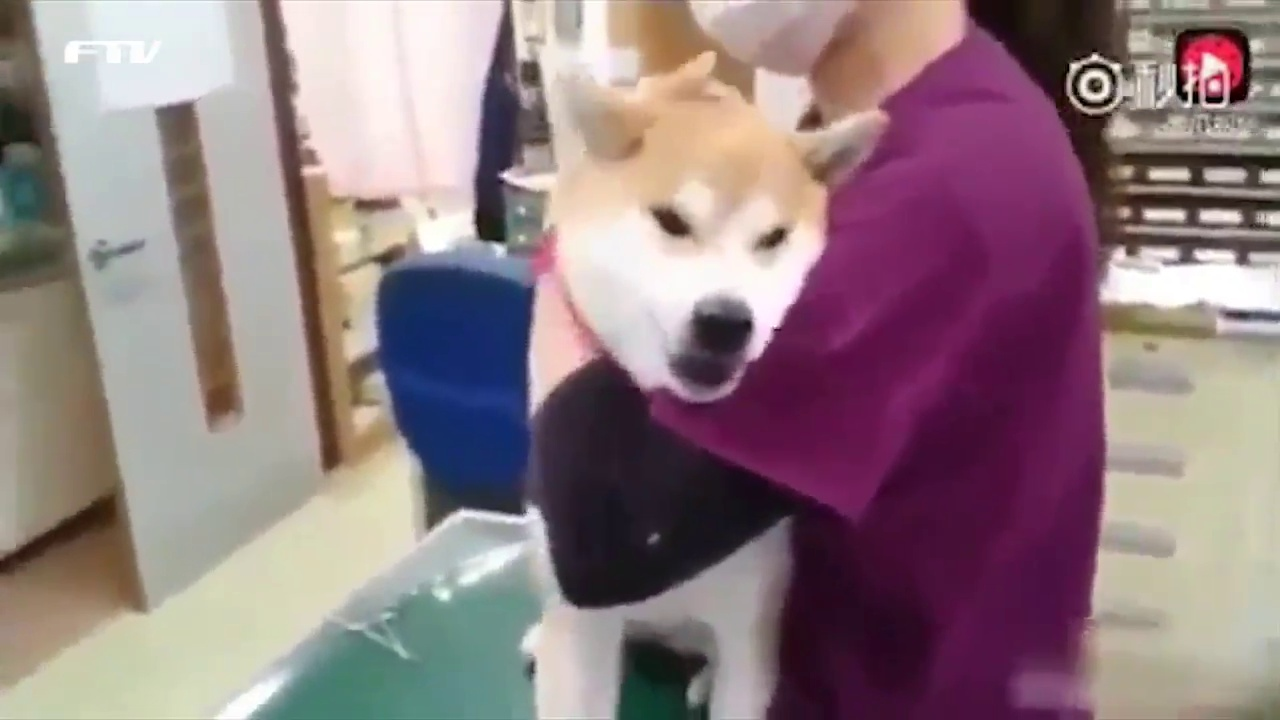

NameError: name 'client' is not defined

In [2]:
import cv2
import base64
import time
from moviepy.editor import VideoFileClip
import os
from IPython.display import display, Image

# 영상 파일 분석 함수
def analyze_video(file_path, seconds_per_frame=2):
    base64Frames = []
    base_video_file, _ = os.path.splitext(file_path)

    video = cv2.VideoCapture(file_path)
    if not video.isOpened():
        raise Exception("영상 파일을 열 수 없습니다.")

    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame = 0

    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()

        if not success:
            break

        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    clip = VideoFileClip(file_path)
    audio_path = f"{base_video_file}.mp3"

    try:
        if clip.audio:
            clip.audio.write_audiofile(audio_path, bitrate="32k")
            clip.audio.close()
            print(f"오디오 추출 완료: {audio_path}")
        else:
            print("영상에 오디오 트랙이 없습니다.")
            audio_path = None
    except Exception as e:
        print(f"오디오 추출 실패: {str(e)}")
        audio_path = None

    clip.close()

    print(f"총 {len(base64Frames)}개의 프레임을 추출했습니다.")
    return base64Frames, audio_path

# 영상 요약 및 디스플레이 함수
def summarize_video(base64Frames, audio_path):
    summary_text = ""
    display_handle = display(None, display_id=True)
    for img in base64Frames:
        display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
        time.sleep(0.025)

    if audio_path is not None:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=open(audio_path, 'rb')
        )
        print("오디오 텍스트 추출 완료:", transcription, '\n')
        summary_text += transcription.text + "\n"

    return summary_text

# 사용자와의 상호작용을 위한 함수
def analyze_video_with_interaction(file_path):
    base64Frames, audio_path = analyze_video(file_path, seconds_per_frame=2)
    video_summary = summarize_video(base64Frames, audio_path)

    while True:
        print("영상 분석에 대해 추가 질문이 있습니까? (없으면 '종료'를 입력해주세요.)")
        user_input = input("입력:")
        if user_input.lower() == "종료":
            print("영상 분석을 종료합니다.")
            break

        # 영상 요약과 사용자 질문을 결합하여 프롬프트 생성
        combined_prompt = video_summary + "\n" + user_input
        print("사용자 질문에 대한 답변:", combined_prompt)

# Google Colab에서 파일 업로드 함수
def upload_video():
    from google.colab import files
    uploaded = files.upload()

    for file_name in uploaded.keys():
        print(f"업로드된 파일: {file_name}")
        analyze_video_with_interaction(file_name)

# Colab에서 영상 파일 업로드 시작
upload_video()
